In [1]:
import geopandas as gpd
import pandas as pd
import pyreadr
from dotenv import load_dotenv
import os

load_dotenv()
os.chdir("/Users/elsecaller/Documents/WORK/kings")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all columns

In [2]:
filekey = pd.read_csv("filekey.csv")

place_fp = os.path.join(filekey.loc[filekey['var_name'] == 'pdac_shp', 'filepath'].values[0])
gsp_shp = os.path.join(filekey.loc[filekey['var_name'] == 'gsp_shp', 'filepath'].values[0])

place_bounds = gpd.read_file(place_fp)
gsp_bounds = gpd.read_file(gsp_shp)

gsp_basin_ids = pd.read_csv("EJ_DAC_Paper/Data/gsp_basin_ids.csv")


<Axes: >

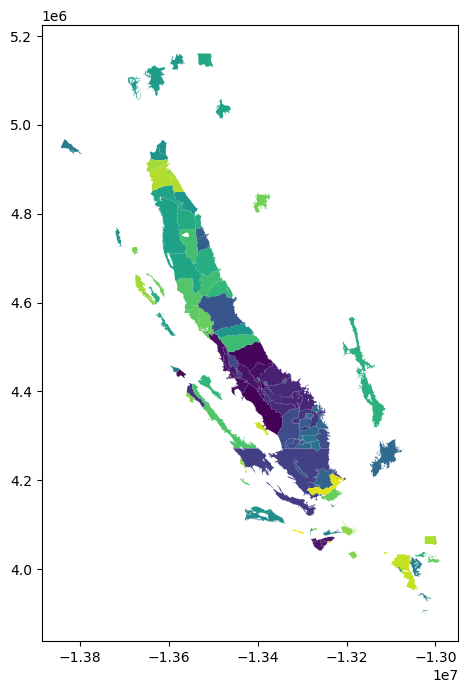

In [3]:
gsp_bounds.plot(column='GSP_ID', figsize=(10, 8))


In [4]:
place_bounds = place_bounds[['GEOID20', 'NAME20', 'Pop20', 'MHI20', 'HH20', 'DAC20', 'geometry']]
gsp_bounds = gsp_bounds[['GSP_ID', 'Basin_Name', 'Basin_Numb', 'Basin_Subb', 'Basin_Su_1', 'geometry']]

print(place_bounds.shape)
print(gsp_bounds.shape)

(1611, 7)
(120, 6)


In [5]:
intersections = gpd.overlay(place_bounds, gsp_bounds, how='intersection')

In [6]:
unique_places = intersections.dissolve(by='GSP_ID', 
                                       as_index=False,
                                       aggfunc = {
                                           'NAME20': lambda x: x.unique(),
                                           'Basin_Name': lambda x: x.unique()[0],
                                           'Basin_Numb': lambda x: x.unique()[0], 
                                           'Basin_Subb': lambda x: x.unique()[0],   
                                       }) 

print(unique_places.shape)

(116, 6)


In [7]:
unique_places.drop_duplicates(subset = ['GSP_ID'],inplace=True)

expected_places = unique_places.drop(columns=['geometry', 'Basin_Numb', 'Basin_Name']).explode('NAME20')

expected_places['NAME20'] = expected_places['NAME20'].str.replace(' ', '_').str.lower()

expected_places.to_csv("EJ_DAC_Paper/Data/expected_places.csv", index=False)